In [1]:
import pickle
import numpy as np
import pandas as pd

from analysis_utils import libraries_in_repos, libraries_in_files, modules_in_repos, modules_in_files, show_popularity, get_corr_table, show_correlation

## Data Load and Setup

In [2]:
ipynb_imports_jupyter_repos = pd.read_parquet('../data/ipynb_imports_jupyter_repos.parquet')
ipynb_imports_python_repos = pd.read_parquet('../data/ipynb_imports_python_repos.parquet')
py_imports_jupyter_repos = pd.read_parquet('../data/py_imports_jupyter_repos.parquet')
py_imports_python_repos = pd.read_parquet('../data/py_imports_python_repos.parquet')

In [3]:
py_files_imports = pd.concat([py_imports_python_repos, py_imports_jupyter_repos])
ipynb_files_imports = pd.concat([ipynb_imports_python_repos, ipynb_imports_jupyter_repos])

In [4]:
py_files_imports['repo'] = py_files_imports['filename'].str.split('/').str[5]
py_files_imports['filename'] = py_files_imports.apply(lambda row: row['filename'].split(row['repo'])[-1], axis=1).str[1:]
py_files_imports = py_files_imports[['repo', 'filename', 'module']]
py_files_imports['library'] = py_files_imports['module'].str.split('.').str[0]
py_files_imports

,repo,filename,module,library
0,-AI-emmmm,PaddleGAN-master/lsr2_preprocess.py,traceback,traceback
1,-AI-emmmm,PaddleGAN-master/lsr2_preprocess.py,tqdm,tqdm
2,-AI-emmmm,PaddleGAN-master/lsr2_preprocess.py,sys,sys
3,-AI-emmmm,PaddleGAN-master/lsr2_preprocess.py,numpy,numpy
4,-AI-emmmm,PaddleGAN-master/lsr2_preprocess.py,ppgan.faceutils,ppgan
...,...,...,...,...
8,zoobot,benchmarks/tensorflow/deprecated/single_task_v...,time,time
9,zoobot,benchmarks/tensorflow/deprecated/single_task_v...,tensorflow,tensorflow
10,zoobot,benchmarks/tensorflow/deprecated/single_task_v...,zoobot.training,zoobot
0,ztdl-masterclasses,tests/test_nb.py,subprocess,subprocess


In [5]:
ipynb_files_imports['repo'] = ipynb_files_imports['filename'].str.split('/').str[5]
ipynb_files_imports['filename'] = ipynb_files_imports.apply(lambda row: row['filename'].split(row['repo'])[-1], axis=1).str[1:]
ipynb_files_imports = ipynb_files_imports[['repo', 'filename', 'module']]
ipynb_files_imports['library'] = ipynb_files_imports['module'].str.split('.').str[0]
ipynb_files_imports

,repo,filename,module,library
0,3D-FUTURE-AI-Challenge-Baseline,segmentation/mmdetection/demo/inference_demo.i...,mmdet.apis,mmdet
1,3D-FUTURE-AI-Challenge-Baseline,segmentation/mmdetection/demo/inference_demo.i...,mmcv,mmcv
0,3D-Tracking-MVS,src/tracking_wo_bnw/experiments/scripts/faster...,mot_data,mot_data
1,3D-Tracking-MVS,src/tracking_wo_bnw/experiments/scripts/faster...,sys,sys
2,3D-Tracking-MVS,src/tracking_wo_bnw/experiments/scripts/faster...,torch,torch
...,...,...,...,...
4,ztdl-masterclasses,notebooks/Machine_Learning_with_Scikit_Learn.i...,sklearn.cluster,sklearn
5,ztdl-masterclasses,notebooks/Machine_Learning_with_Scikit_Learn.i...,matplotlib.pyplot,matplotlib
6,ztdl-masterclasses,notebooks/Machine_Learning_with_Scikit_Learn.i...,pandas,pandas
7,ztdl-masterclasses,notebooks/Machine_Learning_with_Scikit_Learn.i...,sklearn.tree,sklearn


In [6]:
py_repo_count = py_files_imports['repo'].nunique()
py_file_count = py_files_imports['filename'].nunique()
ipynb_repo_count = ipynb_files_imports['repo'].nunique()
ipynb_file_count = ipynb_files_imports['filename'].nunique()

## Most Popular Libraries

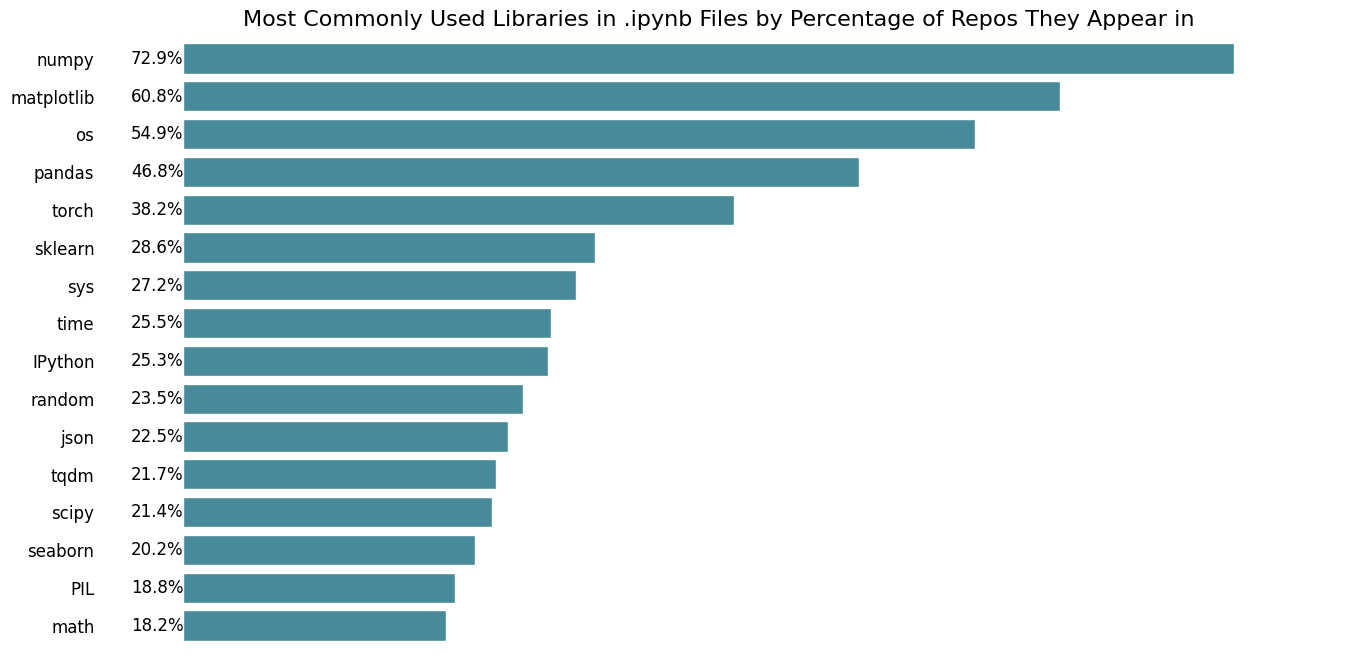

In [7]:
libraries_in_repos_df_ipynb = libraries_in_repos(ipynb_files_imports)
show_popularity(libraries_in_repos_df_ipynb, 'Most Commonly Used Libraries in .ipynb Files by Percentage of Repos They Appear in', 16, ipynb_repo_count)

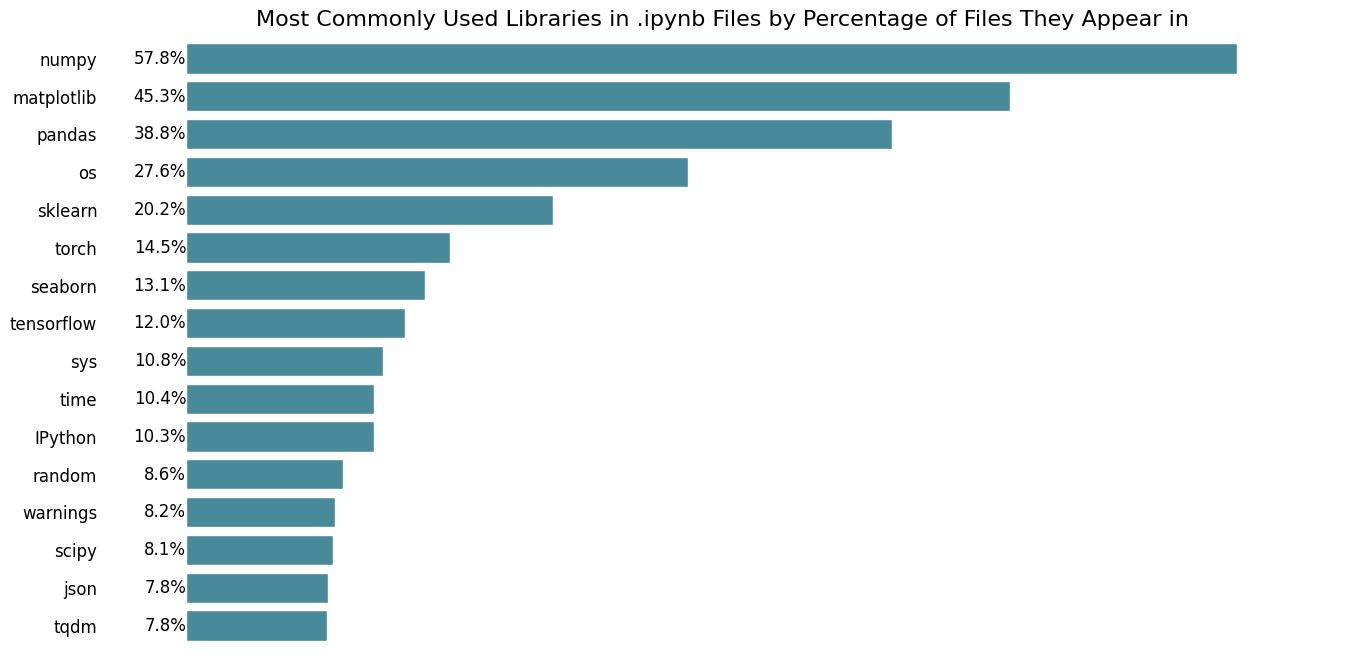

In [8]:
libraries_in_files_df_ipynb = libraries_in_files(ipynb_files_imports)
show_popularity(libraries_in_files_df_ipynb, 'Most Commonly Used Libraries in .ipynb Files by Percentage of Files They Appear in', 16, ipynb_file_count)

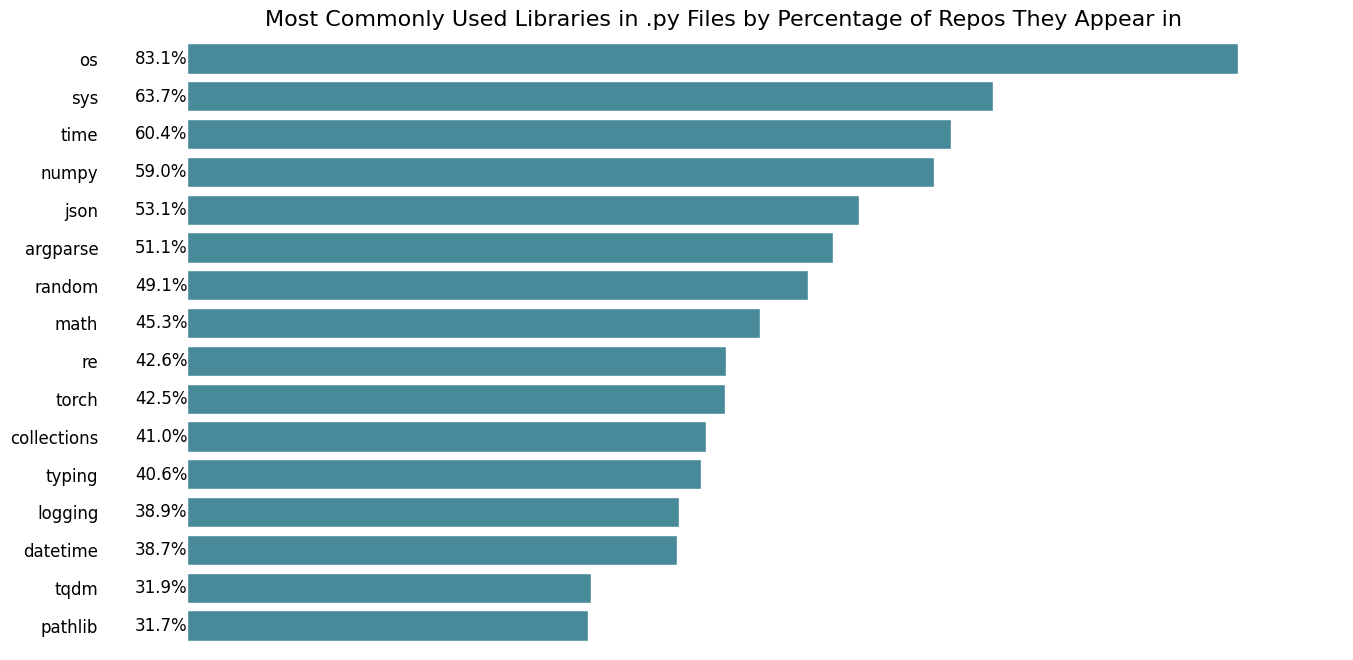

In [9]:
libraries_in_repos_df_py = libraries_in_repos(py_files_imports)
show_popularity(libraries_in_repos_df_py, 'Most Commonly Used Libraries in .py Files by Percentage of Repos They Appear in', 16, py_repo_count)

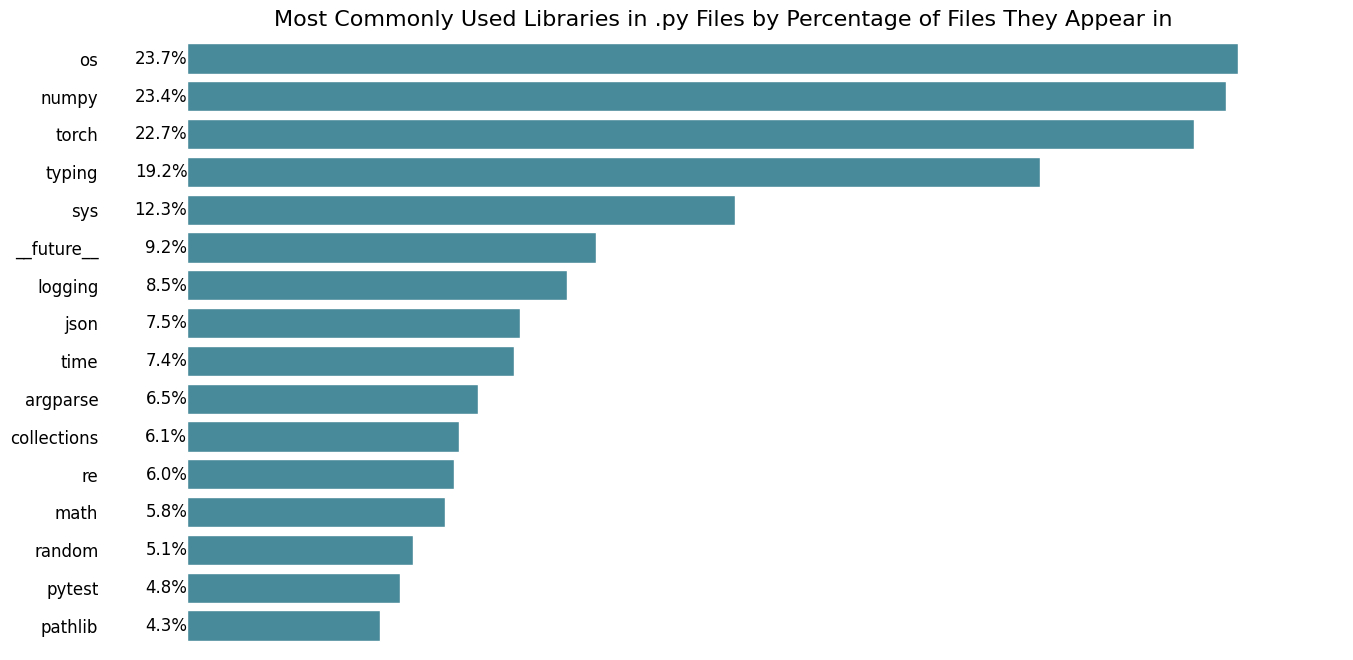

In [10]:
libraries_in_files_df_py = libraries_in_files(py_files_imports)
show_popularity(libraries_in_files_df_py, 'Most Commonly Used Libraries in .py Files by Percentage of Files They Appear in', 16, py_file_count)

## Data Analysis Libraries

In [11]:
data_analysis_libs = ['pandas', 'numpy', 'scipy', 'statsmodels', 'dask', 'polars', 'sympy', 'patsy', 'modin', 'datatable', 'vaex', 'pyspark', 'koalas', 'cudf']

In [12]:
data_analysis_imports_ipynb = ipynb_files_imports[ipynb_files_imports['library'].isin(data_analysis_libs)]
data_analysis_imports_py = py_files_imports[py_files_imports['library'].isin(data_analysis_libs)]

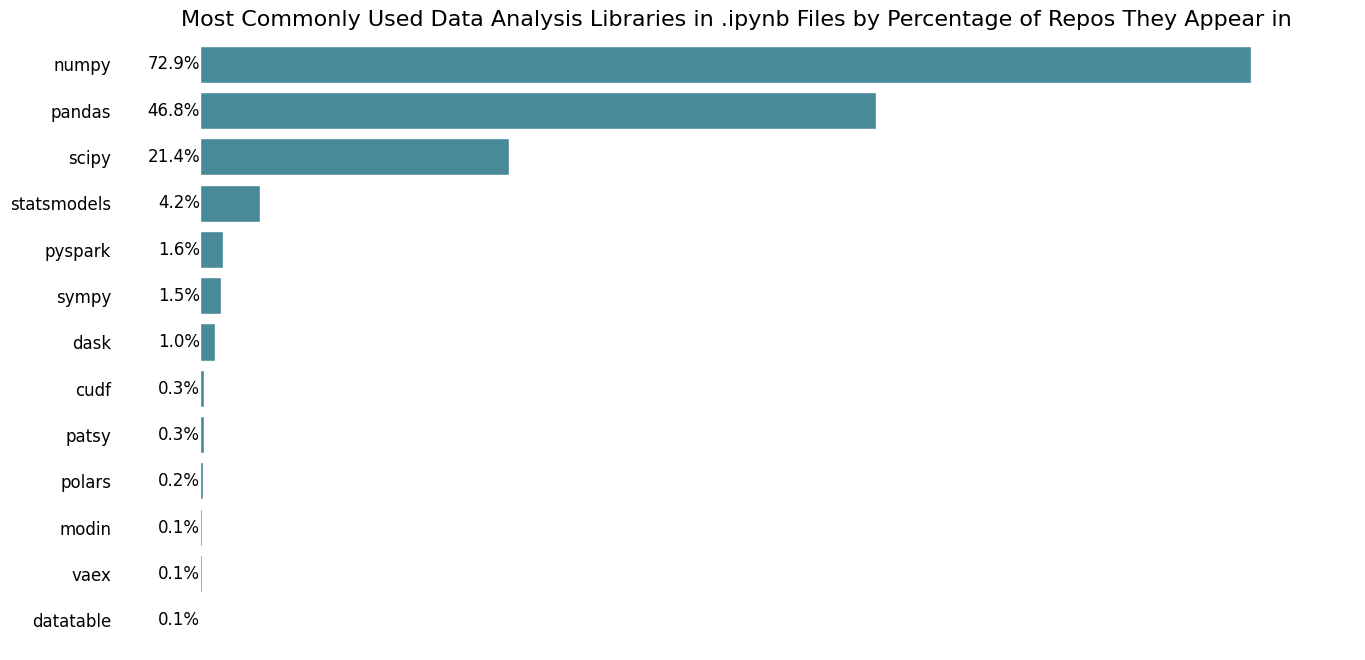

In [13]:
data_analysis_libraries_in_repos_df_ipynb = libraries_in_repos(data_analysis_imports_ipynb)
show_popularity(data_analysis_libraries_in_repos_df_ipynb, 'Most Commonly Used Data Analysis Libraries in .ipynb Files by Percentage of Repos They Appear in', 16, ipynb_repo_count)

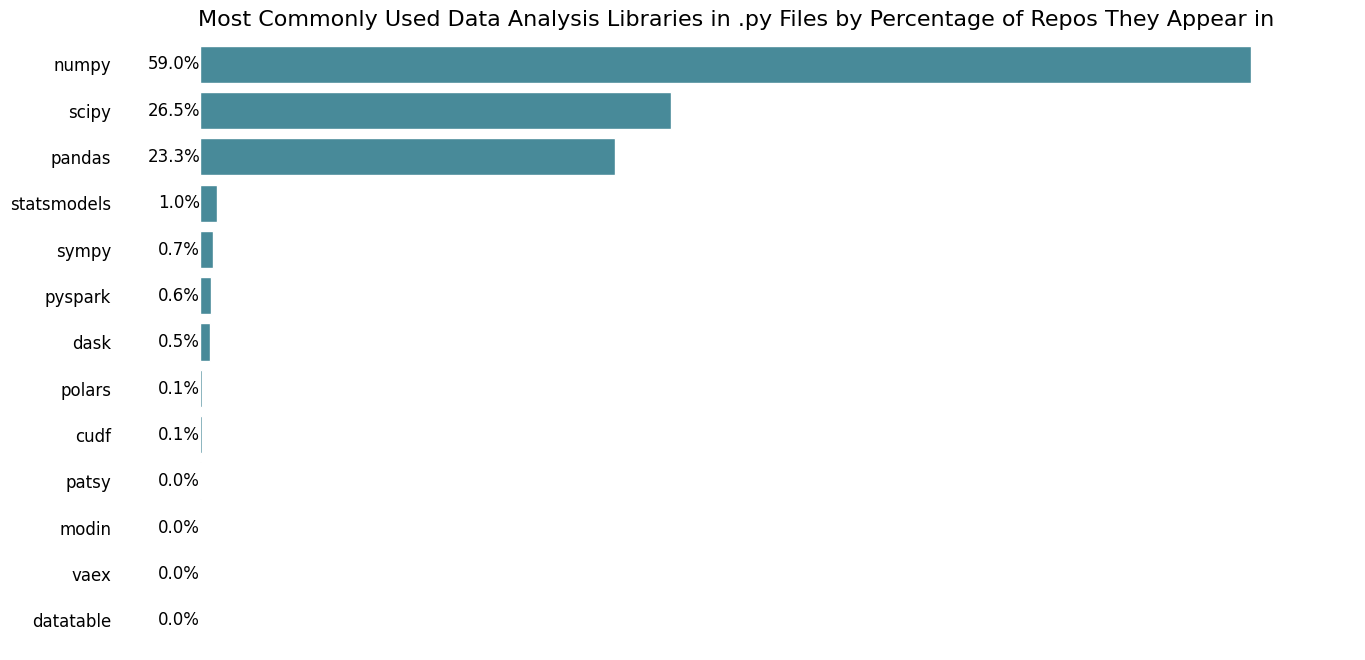

In [14]:
data_analysis_libraries_in_repos_df_py = libraries_in_repos(data_analysis_imports_py)
show_popularity(data_analysis_libraries_in_repos_df_py, 'Most Commonly Used Data Analysis Libraries in .py Files by Percentage of Repos They Appear in', 16, py_repo_count)

## Visualisation Libraries

In [15]:
visualisation_libs = ['matplotlib', 'seaborn', 'bokeh', 'plotly', 'altair', 'ggplot', 'pygal', 'holoviews', 'geopandas', 'folium', 'dash']

In [16]:
visualisation_imports_ipynb = ipynb_files_imports[ipynb_files_imports['library'].isin(visualisation_libs)]
visualisation_imports_py = py_files_imports[py_files_imports['library'].isin(visualisation_libs)]

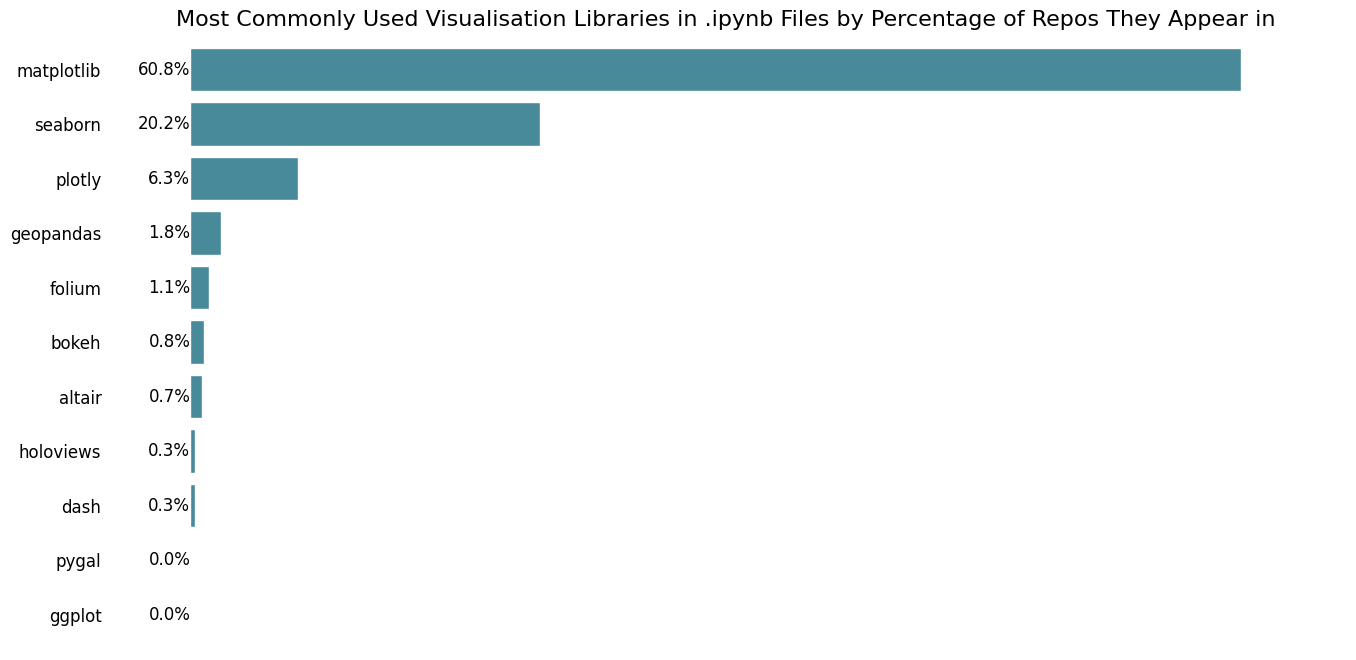

In [17]:
visualisation_libs_in_repos_df_ipynb = libraries_in_repos(visualisation_imports_ipynb)
show_popularity(visualisation_libs_in_repos_df_ipynb, 'Most Commonly Used Visualisation Libraries in .ipynb Files by Percentage of Repos They Appear in', 16, ipynb_repo_count)

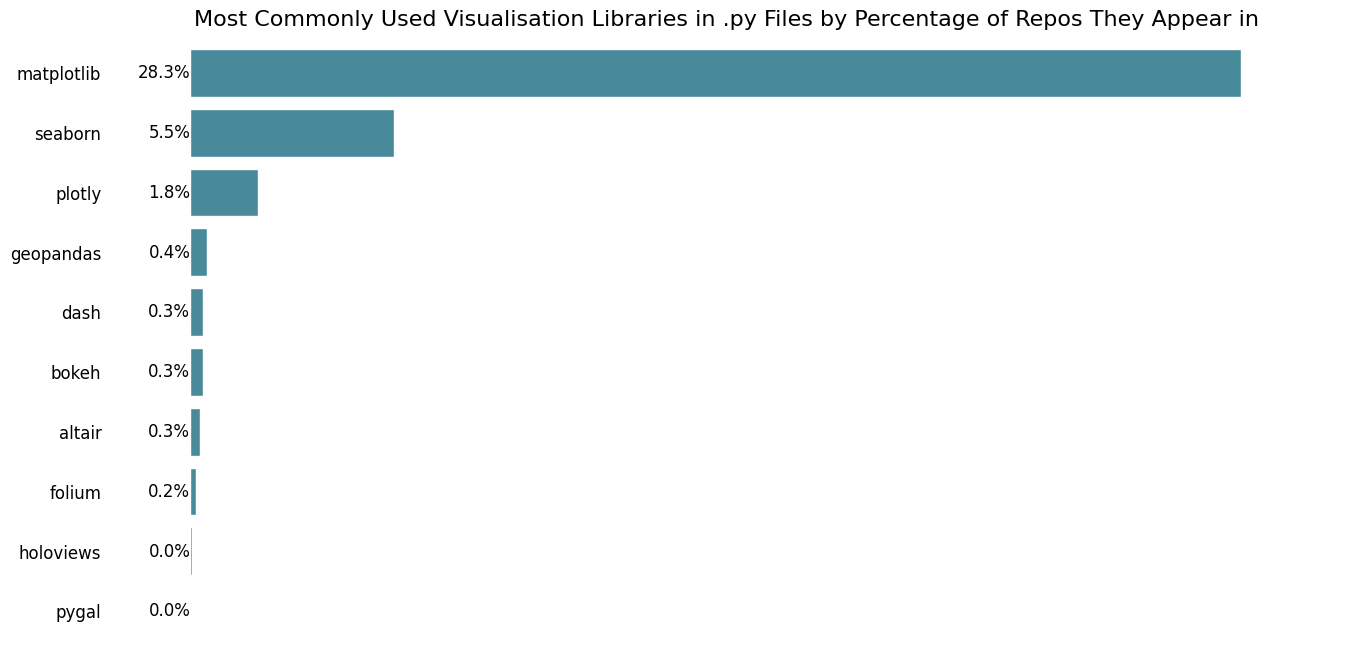

In [18]:
visualisation_libs_in_repos_df_py = libraries_in_repos(visualisation_imports_py)
show_popularity(visualisation_libs_in_repos_df_py, 'Most Commonly Used Visualisation Libraries in .py Files by Percentage of Repos They Appear in', 16, py_repo_count)

## ML Libraries

In [19]:
ml_libs = ['sklearn', 'tensorflow', 'keras', 'xgboost', 'lightgbm', 'catboost', 'theano', 'caffe', 'torch']

In [20]:
ml_imports_ipynb = ipynb_files_imports[ipynb_files_imports['library'].isin(ml_libs)]
ml_imports_py = py_files_imports[py_files_imports['library'].isin(ml_libs)]

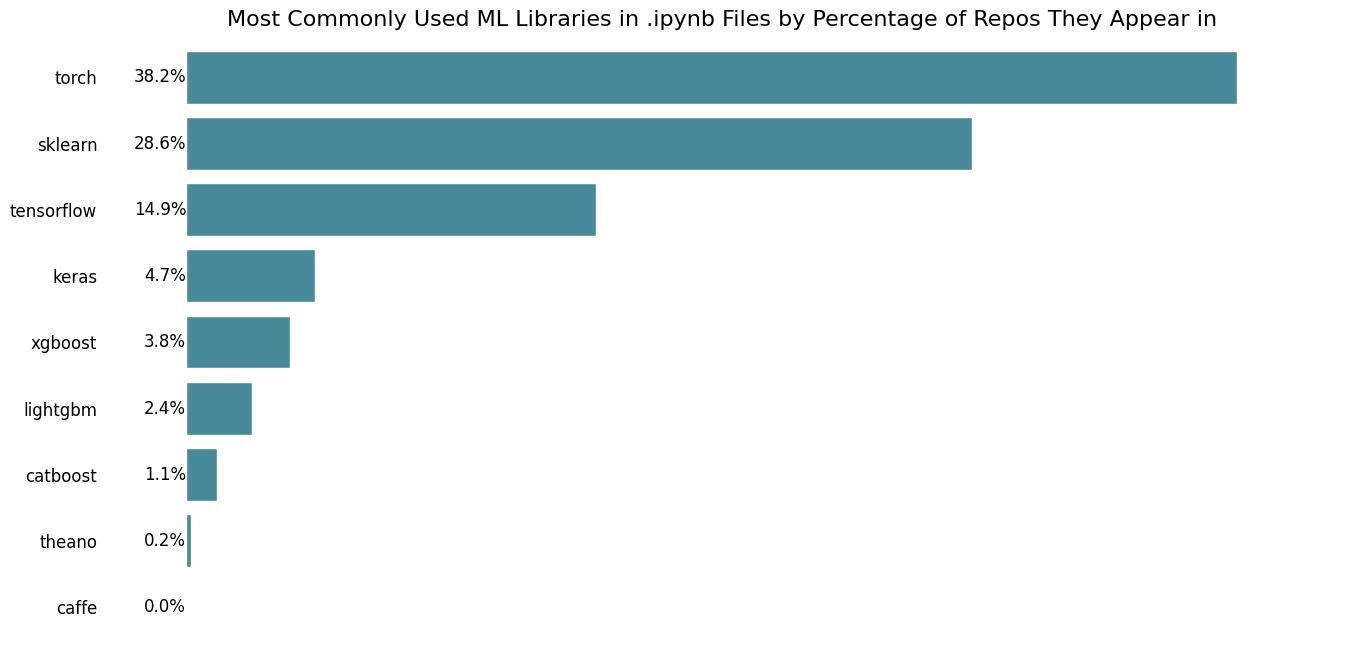

In [21]:
ml_libs_in_repos_df_ipynb = libraries_in_repos(ml_imports_ipynb)
show_popularity(ml_libs_in_repos_df_ipynb, 'Most Commonly Used ML Libraries in .ipynb Files by Percentage of Repos They Appear in', 16, ipynb_repo_count)

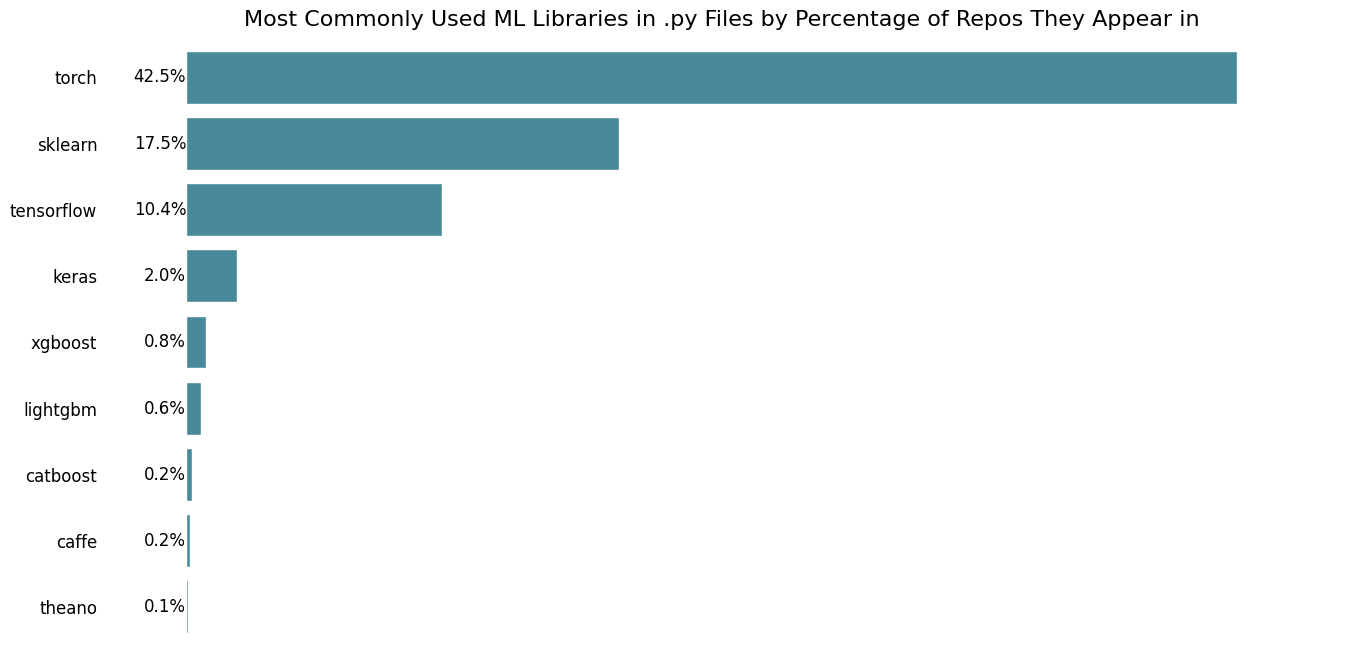

In [22]:
ml_libs_in_repos_df_py = libraries_in_repos(ml_imports_py)
show_popularity(ml_libs_in_repos_df_py, 'Most Commonly Used ML Libraries in .py Files by Percentage of Repos They Appear in', 16, py_repo_count)

## NLP Libraries

In [23]:
nlp_libs = ['nltk', 'spacy', 'gensim', 'textblob', 'stanfordnlp', 'pattern', 'flair', 'transformers']

In [24]:
nlp_imports_ipynb = ipynb_files_imports[ipynb_files_imports['library'].isin(nlp_libs)]
nlp_imports_py = py_files_imports[py_files_imports['library'].isin(nlp_libs)]

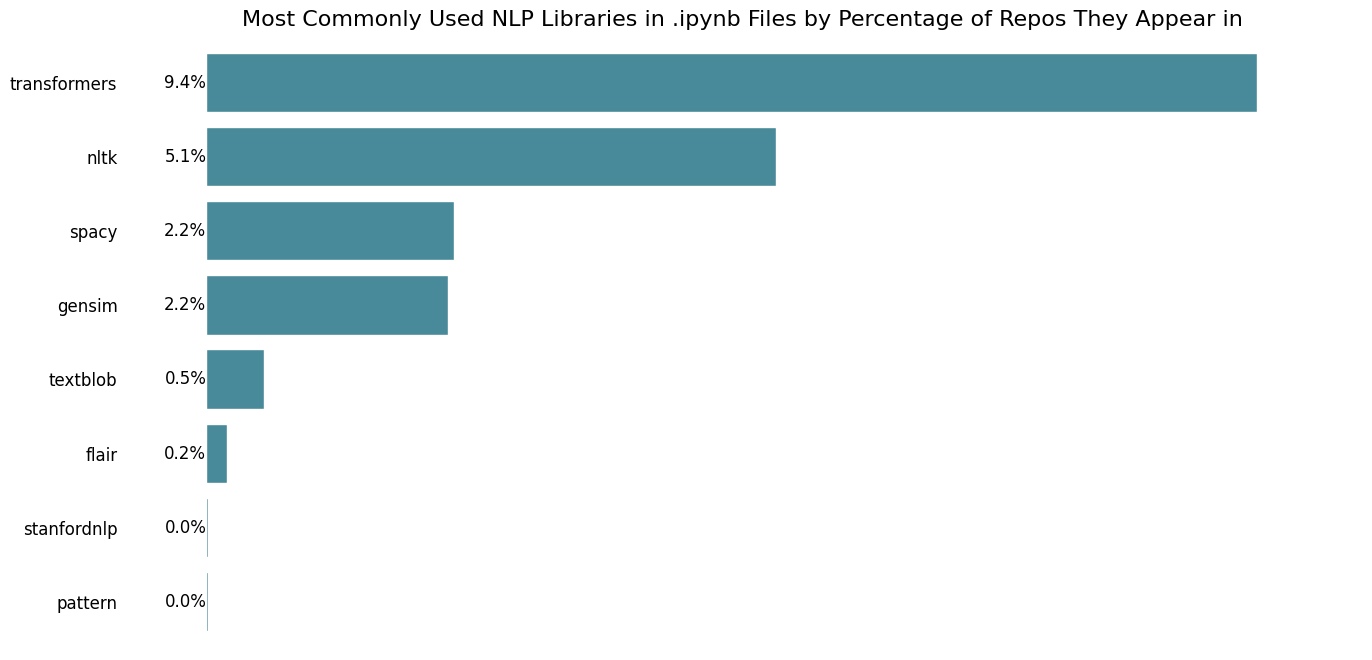

In [25]:
nlp_libs_in_repos_df_ipynb = libraries_in_repos(nlp_imports_ipynb)
show_popularity(nlp_libs_in_repos_df_ipynb, 'Most Commonly Used NLP Libraries in .ipynb Files by Percentage of Repos They Appear in', 16, ipynb_repo_count)

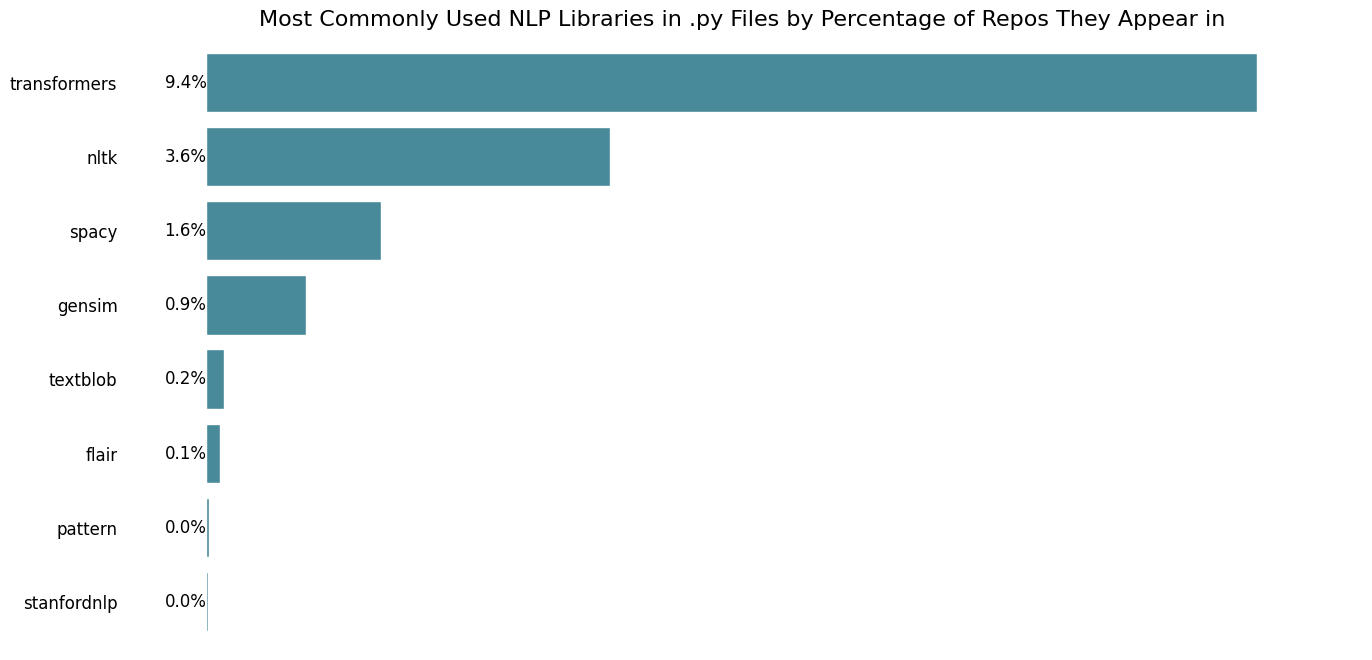

In [26]:
nlp_libs_in_repos_df_py = libraries_in_repos(nlp_imports_py)
show_popularity(nlp_libs_in_repos_df_py, 'Most Commonly Used NLP Libraries in .py Files by Percentage of Repos They Appear in', 16, py_repo_count)

## Backend Libraries

In [27]:
backend_libs = ['django', 'flask', 'fastapi', 'pyramid', 'tornado', 'sanic', 'falcon', 'bottle', 'cherrypy', 'web2py']

In [28]:
backend_imports_ipynb = ipynb_files_imports[ipynb_files_imports['library'].isin(backend_libs)]
backend_imports_py = py_files_imports[py_files_imports['library'].isin(backend_libs)]

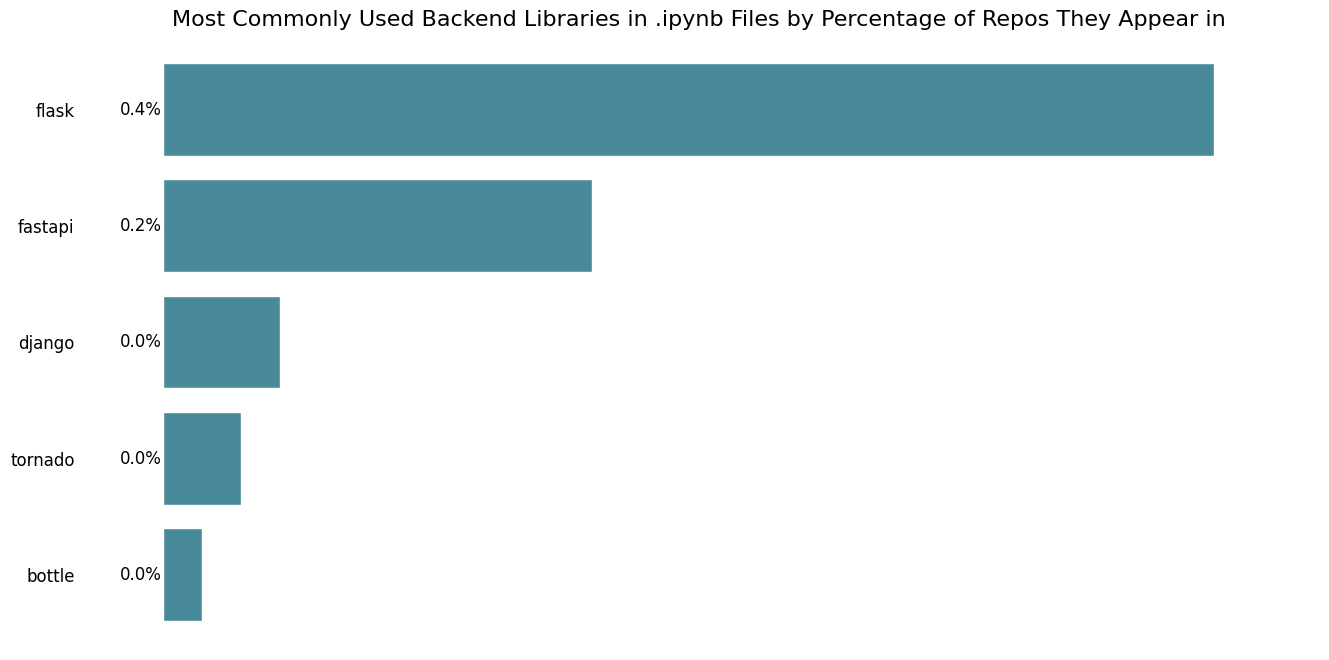

In [29]:
backend_libs_in_repos_df_ipynb = libraries_in_repos(backend_imports_ipynb)
show_popularity(backend_libs_in_repos_df_ipynb, 'Most Commonly Used Backend Libraries in .ipynb Files by Percentage of Repos They Appear in', 16, ipynb_repo_count)

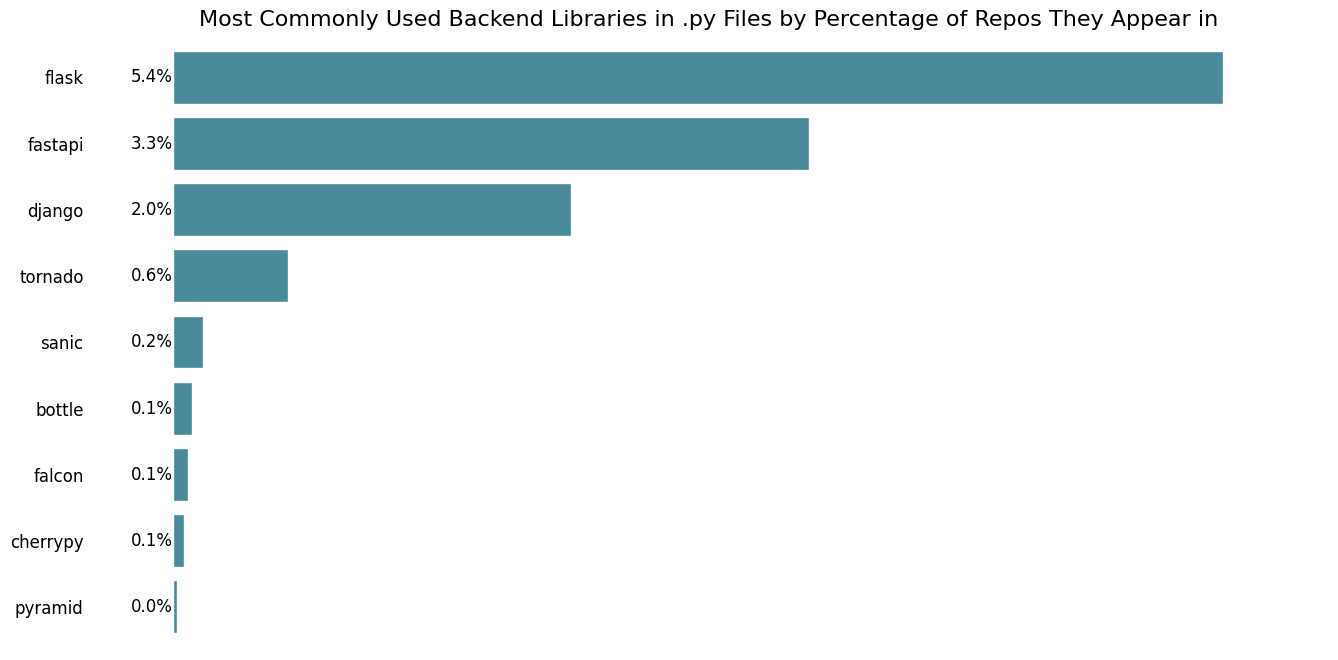

In [30]:
backend_libs_in_repos_df_py = libraries_in_repos(backend_imports_py)
show_popularity(backend_libs_in_repos_df_py, 'Most Commonly Used Backend Libraries in .py Files by Percentage of Repos They Appear in', 16, py_repo_count)

In [31]:
backend_imports_py

,repo,filename,module,library
0,010editor_keygen,fakeserver.py,flask,flask
4,100-Days-of-Code,Day 61/main.py,flask,flask
2,100-Days-of-Code,Day 57/main.py,flask,flask
1,100-Days-of-Code,Day 55/main.py,flask,flask
0,100-Days-of-Code,Day 54/main.py,flask,flask
...,...,...,...,...
5,x-stable-diffusion,PyTorch/server.py,fastapi,fastapi
2,yoloV5_modify_smalltarget,utils/flask_rest_api/restapi.py,flask,flask
2,yolov5-distillation-5.0,utils/flask_rest_api/restapi.py,flask,flask
2,yolov5_annotations,utils/flask_rest_api/restapi.py,flask,flask


## What Libraries are Used Together

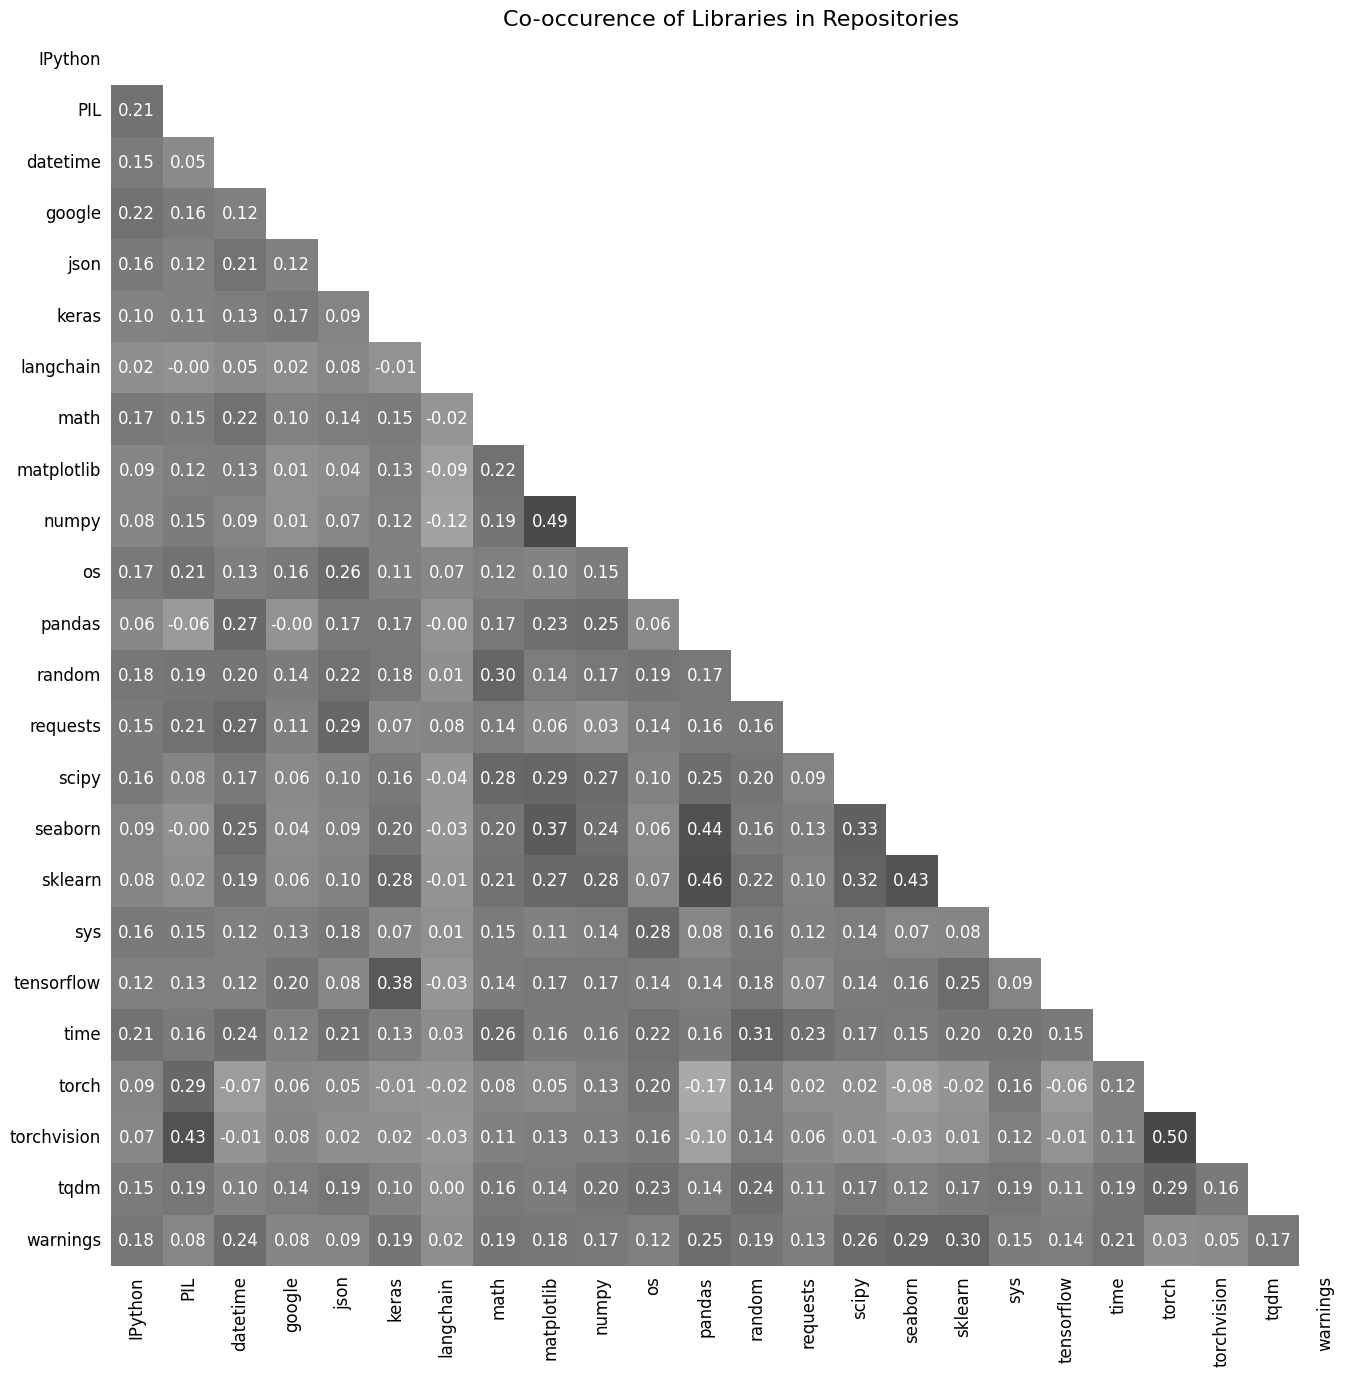

In [48]:
libs_in_repos_corr_ipynb_files = get_corr_table(ipynb_files_imports, index='repo', column='library')
show_correlation(libs_in_repos_corr_ipynb_files, "Co-occurence of Libraries in Repositories")

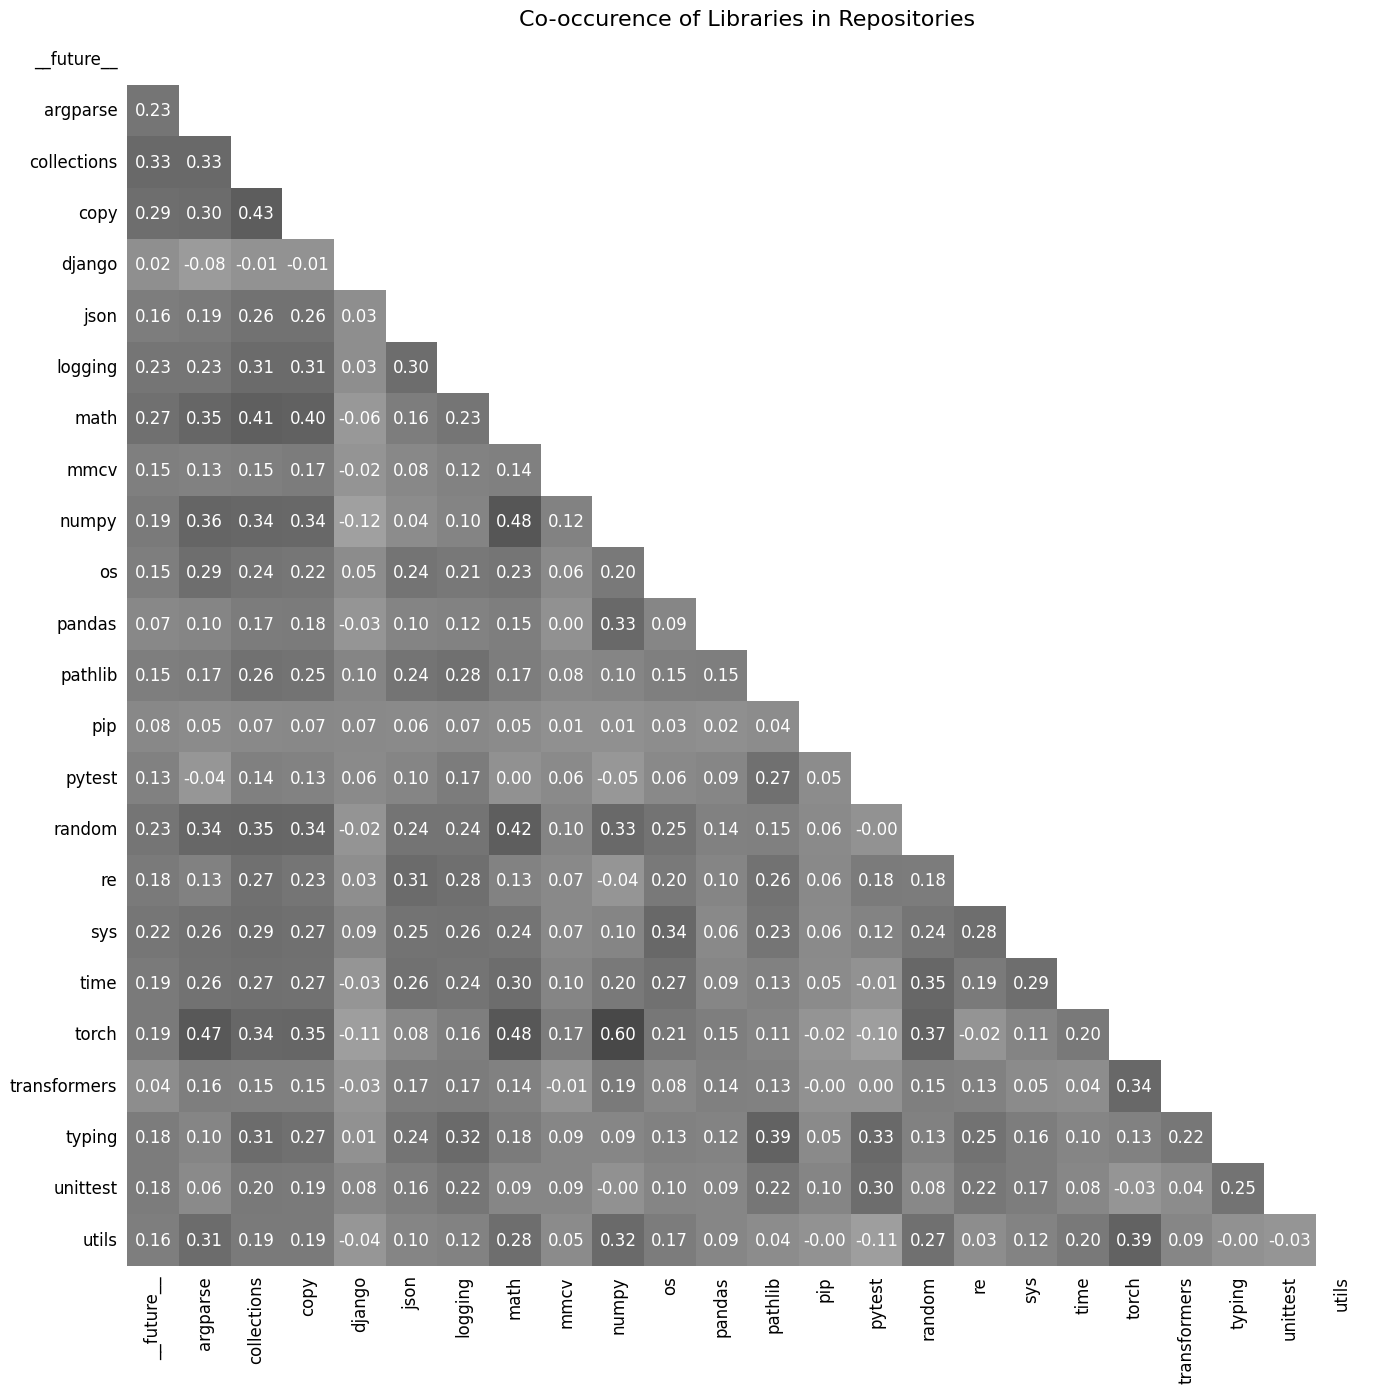

In [49]:
libs_in_repos_corr_py_files = get_corr_table(py_files_imports, index='repo', column='library')
show_correlation(libs_in_repos_corr_py_files, "Co-occurence of Libraries in Repositories")

In [46]:
get_corr_table(ipynb_files_imports, index='repo', column='library', top_n=100)['pandas'].sort_values(ascending=False).head(20)

library
pandas         1.000000
sklearn        0.463506
seaborn        0.447383
datetime       0.277333
numpy          0.276892
warnings       0.259826
scipy          0.257986
matplotlib     0.244617
re             0.223265
statsmodels    0.212697
plotly         0.207758
collections    0.203478
xgboost        0.200919
itertools      0.193636
pickle         0.190131
math           0.180124
json           0.176077
random         0.175310
keras          0.169223
requests       0.168687
Name: pandas, dtype: float64

In [54]:
get_corr_table(py_files_imports, index='repo', column='library', top_n=200)['flask'].sort_values(ascending=False).head(20)

library
flask         1.000000
requests      0.196012
sqlalchemy    0.173864
app           0.160746
threading     0.144511
urllib        0.133700
uuid          0.132000
signal        0.126576
base64        0.122927
hashlib       0.118446
io            0.115763
socket        0.112101
datetime      0.104736
json          0.104112
string        0.102958
logging       0.096351
bs4           0.095648
pprint        0.091277
traceback     0.088045
google        0.086250
Name: flask, dtype: float64

In [55]:
get_corr_table(py_files_imports, index='filename', column='library', top_n=200)['flask'].sort_values(ascending=False).head(20)

library
flask         1.000000
app           0.076896
sqlalchemy    0.054698
json          0.040369
datetime      0.038183
requests      0.037188
sqlite3       0.036960
uuid          0.036037
base64        0.035761
urllib        0.029898
traceback     0.029676
threading     0.026917
http          0.026189
config        0.024136
hashlib       0.023136
io            0.019405
time          0.019286
psutil        0.019026
common        0.018687
string        0.018154
Name: flask, dtype: float64